In [1]:
import time
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime
import matplotlib.dates as mdates
from collections import deque
import numpy as np

import serial
import re

PORT = "/dev/cu.usbmodem14203"

# How many sensor samples we want to store
HISTORY_SIZE = 2500

# Pause re-sampling the sensor and drawing for INTERVAL seconds
INTERVAL = 0.01

print(help(serial))


Help on package serial:

NAME
    serial

DESCRIPTION
    # This is a wrapper module for different platform implementations
    #
    # This file is part of pySerial. https://github.com/pyserial/pyserial
    # (C) 2001-2020 Chris Liechti <cliechti@gmx.net>
    #
    # SPDX-License-Identifier:    BSD-3-Clause

PACKAGE CONTENTS
    __main__
    rfc2217
    rs485
    serialcli
    serialjava
    serialposix
    serialutil
    serialwin32
    threaded (package)
    tools (package)
    urlhandler (package)
    win32

FUNCTIONS
    serial_for_url(url, *args, **kwargs)
        Get an instance of the Serial class, depending on port/url. The port is not
        opened when the keyword parameter 'do_not_open' is true, by default it
        is. All other parameters are directly passed to the __init__ method when
        the port is instantiated.
        
        The list of package names that is searched for protocol handlers is kept in
        ``protocol_handler_packages``.
        
        e.g.

In [2]:
serialport = None

def get_imu_data():
    global serialport
    if not serialport:
        # open serial port
        serialport = serial.Serial(PORT, 115200, timeout=0.1)
        # check which port was really used
        print("Opened", serialport.name)
        # Flush input
        time.sleep(3)
        serialport.readline()
    print(serialport.readline())
    # Poll the serial port
    line = str(serialport.readline(), 'utf-8')
    if not line:
        return None
    #print(line)
    if not "Uni:" in line:
        return None
    vals = line.replace("Uni:", "").strip().split(',')
    #print(vals)
    if len(vals) != 9:
        return None
    try:
        vals = [float(i) for i in vals]
    except ValueError:
        return None
    #print(vals)
    return vals

for _ in range(20):
    print(get_imu_data())

Opened /dev/cu.usbmodem14203
b'\r\n'
None
b"gr_y-axis: 0.000000'\r\n"
None
b'\r\n'
None
b"mg_y-axis: 0.000000'\r\n"
None
b'\r\n'
None
b"xl_x-axis: 0.000000'\r\n"
None
b"xl_z-axis: 0.000000'\r\n"
None
b"gr_x-axis: 0.000000'\r\n"
None
b"gr_z-axis: 0.000000'\r\n"
None
b"mg_x-axis: 0.000000'\r\n"
None
b"mg_z-axis: 0.000000'\r\n"
None
b"Roll: 0.000000' Pitch: 0.000000' Yaw: 0.000000' X: 0.000000' Y: 0.000000' Z: -1.000000\r\n"
None
b"xl_y-axis: 0.000000'\r\n"
None
b'\r\n'
None
b"gr_y-axis: 0.000000'\r\n"
None
b'\r\n'
None
b"mg_y-axis: 0.000000'\r\n"
None
b'\r\n'
None
b"xl_x-axis: 0.000000'\r\n"
None
b"xl_z-axis: 0.000000'\r\n"
None


# Magnetometer data capture

<IPython.core.display.Javascript object>


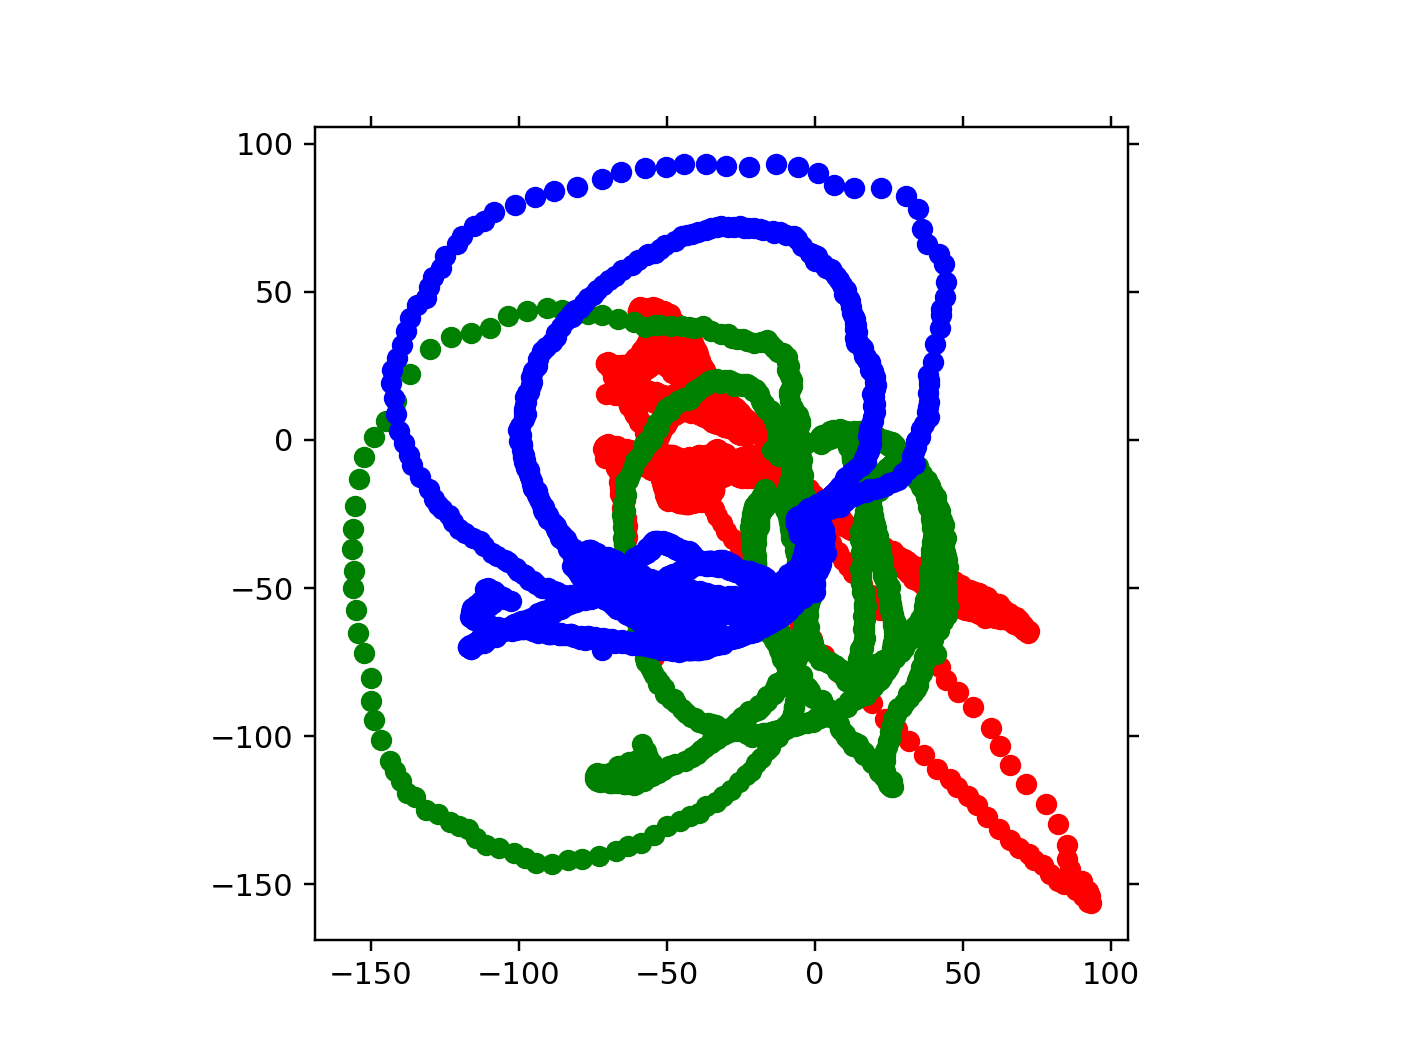

In [53]:
# Deque for axes
mag_x = deque(maxlen=HISTORY_SIZE)
mag_y = deque(maxlen=HISTORY_SIZE)
mag_z = deque(maxlen=HISTORY_SIZE)

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None
anim = None

def onClick(event):
    anim.event_source.stop()
    
def animate(i):
    for _ in range(30):
        ret = get_imu_data()
        if not ret:
            continue
        x, y, z = ret[6:9]
        mag_x.append(x)
        mag_y.append(y)
        mag_z.append(z)

    # Clear all axis
    ax.cla()

    # Display the sub-plots
    ax.scatter(mag_x, mag_y, color='r')
    ax.scatter(mag_y, mag_z, color='g')
    ax.scatter(mag_z, mag_x, color='b')
    
    if len(mag_x) == HISTORY_SIZE:
        anim.event_source.stop()
    # Pause the plot for INTERVAL seconds 
    plt.pause(INTERVAL)

fig.canvas.mpl_connect('button_press_event', onClick)    
anim = FuncAnimation(fig, animate)

In [40]:
mag_x

deque([-55.07,
       -54.41,
       -55.74,
       -56.09,
       -56.68,
       -57.0,
       -57.5,
       -58.13,
       -58.24,
       -59.02,
       -59.08,
       -59.78,
       -59.59,
       -59.94,
       -59.82,
       -60.01,
       -59.95,
       -60.3,
       -60.14,
       -60.13,
       -60.52,
       -60.77,
       -60.61,
       -61.06,
       -60.86,
       -61.6,
       -61.49,
       -62.19,
       -62.89,
       -63.01,
       -63.56,
       -63.58,
       -63.69,
       -64.35,
       -64.4,
       -64.43,
       -63.94,
       -64.31,
       -63.91,
       -63.46,
       -63.96,
       -63.86,
       -63.43,
       -64.19,
       -62.96,
       -63.01,
       -62.99,
       -62.72,
       -62.73,
       -62.15,
       -61.49,
       -61.72,
       -61.4,
       -60.63,
       -60.79,
       -60.39,
       -60.17,
       -60.11,
       -59.57,
       -59.21,
       -59.34,
       -58.48,
       -57.82,
       -56.85,
       -57.18,
       -56.42,
       -55.64,
 

X range:  -71.54 93.31
Y range:  -156.34 44.87
Z range:  -143.16 44.42
Final calibration in uTesla: [10.884999999999998, -55.735, -49.37]


<IPython.core.display.Javascript object>


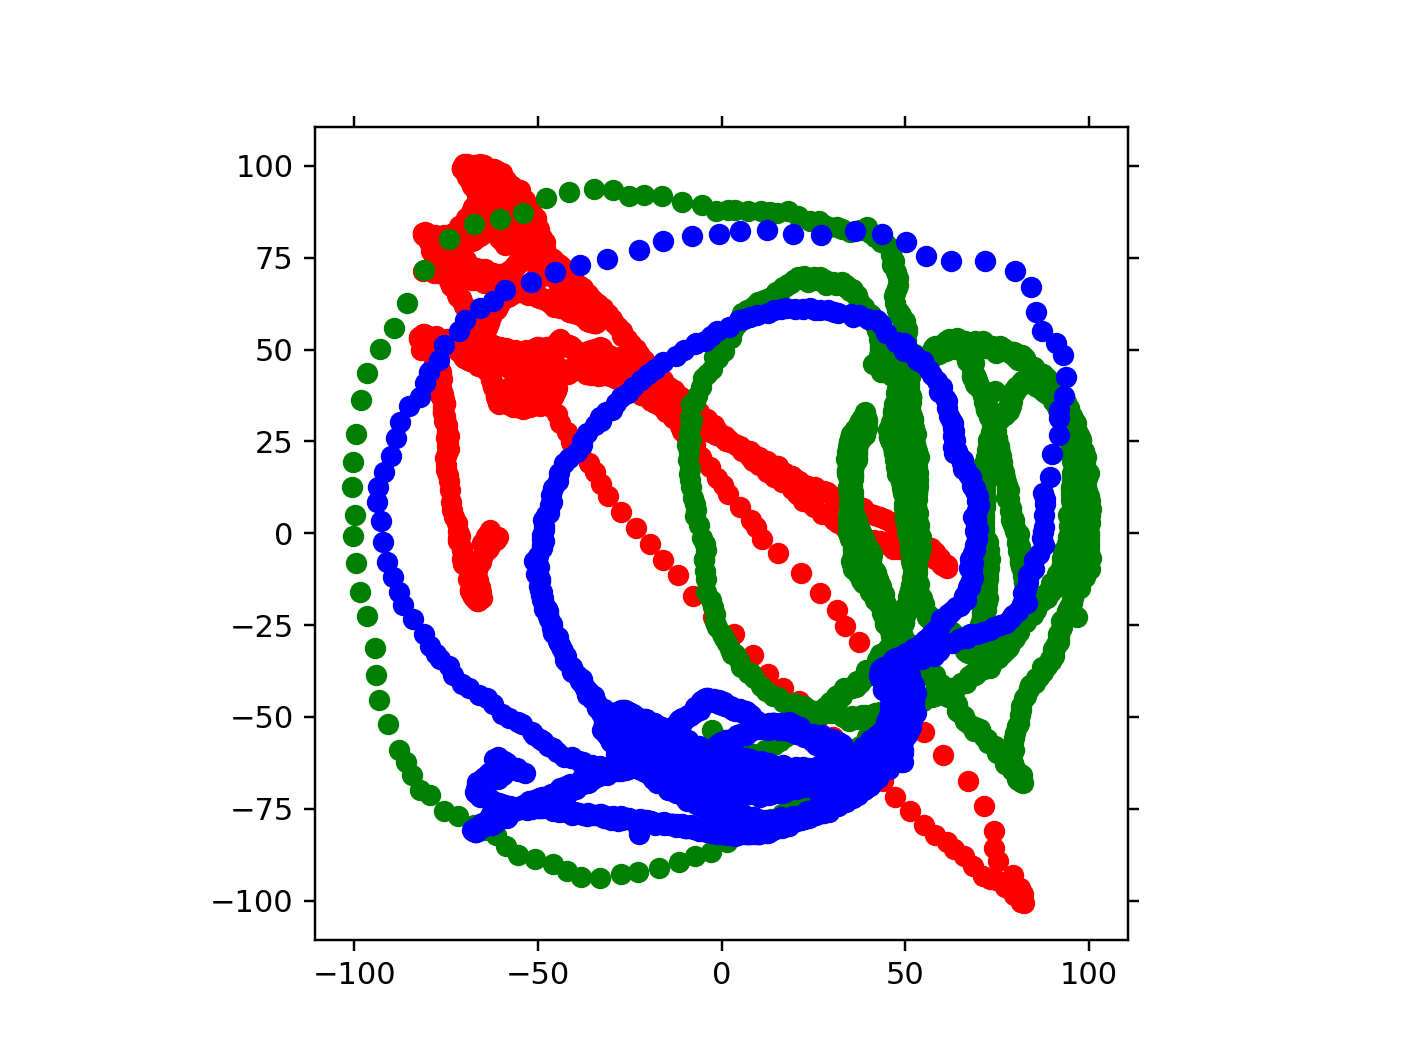

In [54]:
min_x = min(mag_x)
max_x = max(mag_x)
min_y = min(mag_y)
max_y = max(mag_y)
min_z = min(mag_z)
max_z = max(mag_z)

print("X range: ", min_x, max_x)
print("Y range: ", min_y, max_y)
print("Z range: ", min_z, max_z)

mag_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]
print("Final calibration in uTesla:", mag_calibration)

cal_mag_x = [x - mag_calibration[0] for x in mag_x]
cal_mag_y = [y - mag_calibration[1] for y in mag_y]
cal_mag_z = [z - mag_calibration[2] for z in mag_z]

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# Clear all axis
ax.cla()

# Display the now calibrated data
ax.scatter(cal_mag_x, cal_mag_y, color='r')
ax.scatter(cal_mag_y, cal_mag_z, color='g')
ax.scatter(cal_mag_z, cal_mag_x, color='b')
fig.show()

# Gyroscope offset calibration

Put down the board and do not touch or move it!
3...2...1...COLLECTING GYRO DATA
Opened COM44
Gyro X range:  -0.0336 -0.012
Gyro Y range:  -0.0053 0.0155
Gyro Z range:  -0.0005 0.024
Final calibration in rad/s: [-0.0228, 0.0051, 0.01175]


<IPython.core.display.Javascript object>


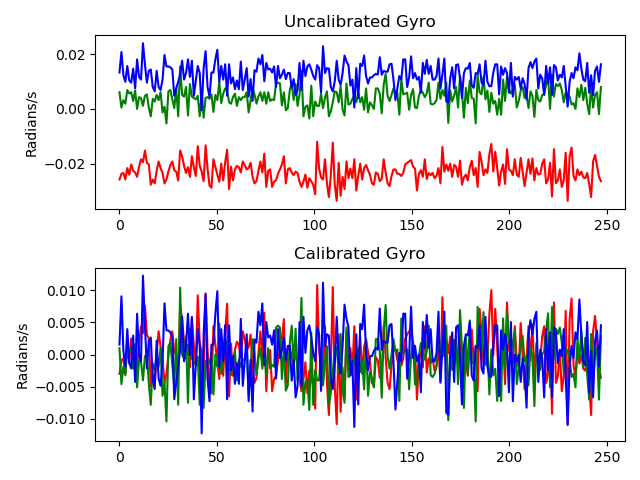

In [ ]:
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING GYRO DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

# Deque for axes
gyro_x = deque(maxlen=HISTORY_SIZE//10)
gyro_y = deque(maxlen=HISTORY_SIZE//10)
gyro_z = deque(maxlen=HISTORY_SIZE//10)
while len(gyro_x) < (HISTORY_SIZE//10):
    ret = get_imu_data()
    #print(ret)
    if not ret:
        continue
    x, y, z = ret[3:6]
    gyro_x.append(x)
    gyro_y.append(y)
    gyro_z.append(z)

for _ in range(3):
    gyro_x.popleft()
    gyro_y.popleft()
    gyro_z.popleft()

min_x = min(gyro_x)
max_x = max(gyro_x)
min_y = min(gyro_y)
max_y = max(gyro_y)
min_z = min(gyro_z)
max_z = max(gyro_z)

print("Gyro X range: ", min_x, max_x)
print("Gyro Y range: ", min_y, max_y)
print("Gyro Z range: ", min_z, max_z)

gyro_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]
print("Final calibration in rad/s:", gyro_calibration)

fig, (uncal, cal) = plt.subplots(2, 1)

# Clear all axis
uncal.cla()
t = np.linspace(0, len(gyro_x), len(gyro_x))
# plot uncalibrated data
uncal.plot(t, gyro_x, color='r')
uncal.plot(t, gyro_y, color='g')
uncal.plot(t, gyro_z, color='b')
uncal.title.set_text("Uncalibrated Gyro")
uncal.set(ylabel='Radians/s')
# plot calibrated data
cal.plot(t, [x - gyro_calibration[0] for x in gyro_x], color='r')
cal.plot(t, [y - gyro_calibration[1] for y in gyro_y], color='g')
cal.plot(t, [z - gyro_calibration[2] for z in gyro_z], color='b')
cal.title.set_text("Calibrated Gyro")
cal.set(ylabel='Radians/s')

fig.tight_layout()
fig.show()
serialport.close()